In [4]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
#from utils_imgprocessing import *

directory_work = "/content/drive/My Drive/Work/01_ProyectoARIA" #ScrappingWeb.ipynb
os.chdir(directory_work)

def load_code_from_url(url_path):
  code_str = urlopen(url_path).read()
  code_str = code_str.decode('utf-8')
  exec(code_str)
  return code_str

Mounted at /content/drive/


In [ ]:
code_str = load_code_from_url("https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/bin/utils_imgprocessing.py")
exec(code_str)

In [ ]:
directory_work = "/content/drive/My Drive/Work/01_ProyectoARIA"
set_directory_work(directory_work)

set_directory_work | [/content/drive/My Drive/Work/01_ProyectoARIA]


In [ ]:
from skimage import exposure

def load_image(name_image, directory='/images'):
  print("*************{}*****************".format(name_image))
  img_json = read_image(name_image,directory=directory)
  if not img_json['error']:
    return img_json
  else:
    print("ERROR | load_image | {0}".format(img_json['name']))
    return None

def load_list_images(list_names_images, directory='/images'):
  list_img = []
  for name_image in list_names_images:
    img_obj = load_image(name_image, directory=directory)
    if img_obj != None:
      list_img.append( img_obj )
  return list_img

In [ ]:
n_start = 0
n_end = 1

partial_name = "CUOX_SEG" 
num_images = 2

directory='/images/{0}'.format(partial_name)
print("Images from {0}".format(partial_name))
list_names_images_seg = get_list_img(directory, filter="*_SEG.*")
print(" labeled images: {0}".format(len(list_names_images_seg)))
print(" total images  : {0}".format(len(get_list_img(directory, filter="*"))))
list_names_images_seg = list_names_images_seg[0:2]
list_test_img_01 = [x.replace("_SEG","") for x in list_names_images_seg]
list_test_img_02 = list_names_images_seg
# loading images 
list_test_img_01 = load_list_images(list_test_img_01[0:num_images], directory=directory)
list_test_img_02 = load_list_images(list_test_img_02[0:num_images], directory=directory)


Images from CUOX_SEG
 labeled images: 425
 total images  : 850
*************27082020_1.JPG*****************
*************27082020_2.JPG*****************
*************27082020_1_SEG.JPG*****************
*************27082020_2_SEG.JPG*****************


In [ ]:
num_img = 10
directory = "/images/CUOX_ORIGINALES"
list_names_img = ["09062020_1 ({0}).jpg".format(num) for num in range(1,num_img+1)]
list_img = load_list_images(list_names_img, directory=directory)

*************09062020_1 (1).jpg*****************
*************09062020_1 (2).jpg*****************
*************09062020_1 (3).jpg*****************
*************09062020_1 (4).jpg*****************
*************09062020_1 (5).jpg*****************
*************09062020_1 (6).jpg*****************
*************09062020_1 (7).jpg*****************
*************09062020_1 (8).jpg*****************
*************09062020_1 (9).jpg*****************
*************09062020_1 (10).jpg*****************


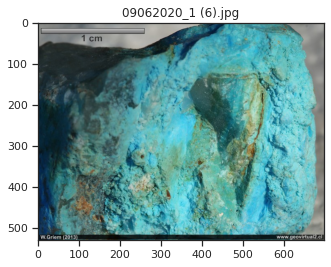

In [ ]:
idx = 5
plot_img(list_img[idx]['img'], title=list_img[idx]['name'])

In [ ]:
from skimage.util.shape import view_as_blocks
from skimage import color 
from skimage import exposure
from skimage import img_as_float


def plot_img_and_hist(image, bins=256):
  """Plot an image along with its histogram and cumulative histogram.

  """
  plt.xlim([0, 256])
  histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
  plt.plot(bin_edges[0:-1], histogram, color='r')
  plt.xlabel("Color value")
  plt.ylabel("Pixels")
  return

def rectangles_split_image(img_obj, h=100, w=100):
  #load and convert image to gray, then extract texture label
  img_src = img_obj['img']
  img_gray = np.uint8(cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY))
  #https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
  img_work = np.uint8(cv2.equalizeHist(img_gray))
  (H,W) = img_work.shape
  list_rectangles = []
  for y in range(0, H, h):
    for x in range(0, W, w):
      img_cut = img_work[ y : y+h , x : x+w ]
      #img_color_cut = img_src[ y : y+h , x : x+w ]
      if (img_cut.shape[0]==h and img_cut.shape[1]==w):
        list_rectangles.append({
            'img': img_cut,
            #'img_color': img_color_cut,
            'name_img_original': img_obj['name'],
            'Pxy': [x,y],
            'size': h * w,
            'name': "{0}__{1}_{2}".format(img_obj['name'],x,y)
        })
  return list_rectangles

img_obj = list_img[4]
list_rectangles = rectangles_split_image(img_obj, h=20, w=20)

print("Image name    : [{0}]".format(img_obj['name']))
print("Sub images num: {0}".format(len(list_rectangles)))

Image name    : [09062020_1 (5).jpg]
Sub images num: 372


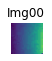

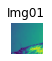

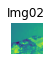

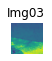

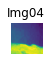

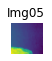

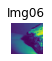

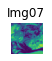

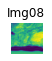

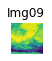

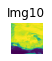

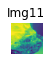

In [ ]:
plot_list_img([obj['img'] for obj in  list_rectangles])

In [ ]:
!pip install mahotas

In [ ]:
[obj['name'] for obj in  list_rectangles]

['09062020_1 (5).jpg__0_0',
 '09062020_1 (5).jpg__20_0',
 '09062020_1 (5).jpg__40_0',
 '09062020_1 (5).jpg__60_0',
 '09062020_1 (5).jpg__80_0',
 '09062020_1 (5).jpg__100_0',
 '09062020_1 (5).jpg__120_0',
 '09062020_1 (5).jpg__140_0',
 '09062020_1 (5).jpg__160_0',
 '09062020_1 (5).jpg__180_0',
 '09062020_1 (5).jpg__200_0',
 '09062020_1 (5).jpg__220_0',
 '09062020_1 (5).jpg__240_0',
 '09062020_1 (5).jpg__260_0',
 '09062020_1 (5).jpg__280_0',
 '09062020_1 (5).jpg__300_0',
 '09062020_1 (5).jpg__320_0',
 '09062020_1 (5).jpg__340_0',
 '09062020_1 (5).jpg__360_0',
 '09062020_1 (5).jpg__380_0',
 '09062020_1 (5).jpg__400_0',
 '09062020_1 (5).jpg__420_0',
 '09062020_1 (5).jpg__440_0',
 '09062020_1 (5).jpg__460_0',
 '09062020_1 (5).jpg__480_0',
 '09062020_1 (5).jpg__500_0',
 '09062020_1 (5).jpg__520_0',
 '09062020_1 (5).jpg__540_0',
 '09062020_1 (5).jpg__560_0',
 '09062020_1 (5).jpg__580_0',
 '09062020_1 (5).jpg__600_0',
 '09062020_1 (5).jpg__0_20',
 '09062020_1 (5).jpg__20_20',
 '09062020_1 (5).

In [ ]:
import mahotas
def features_extraction(img_gray):
  #extract texture features in 4 directions and take mean
  features = mahotas.features.haralick(img_gray).mean(axis=0)
  #features = (features-features.min())/(features.max()-features.min())
  return features

list_data_json = []
for img_obj in list_rectangles:
  scale = img_obj['size']
  #hst = histogram(img_obj['img'],scale=scale)
  features = features_extraction(img_obj['img'])
  #img_obj['hst'] = hst
  list_data_json.append({ 'name': img_obj['name'], 'features': features})
#test_multigamma_value(img_json['img'])

In [ ]:
import pandas as pd
def build_dataframe(list_obj):
  list_data = []
  for img_json in list_obj:
    data_json = {
        "name": img_json['name']
    }
    features = img_json['features']
    for n, one_feature in enumerate(features):
      data_json.update( {'f{0}'.format(n) : one_feature} )
    list_data.append(data_json)
  pd_img = pd.json_normalize(list_data)
  return pd_img

pd_img = build_dataframe(list_data_json)
pd_img.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,0.070153,185.898744,0.853037,803.437165,0.440418,257.019093,3027.849915,5.072767,6.302273,0.003625,2.954602,-0.481203,0.966770
std,0.098657,280.912257,0.095806,1404.152258,0.280897,135.549237,5384.969538,1.794749,2.505630,0.006996,1.649094,0.089991,0.048224
min,0.001681,0.139335,0.259648,0.249945,0.057662,10.985734,0.860443,1.007848,1.099468,0.000090,0.468830,-0.676664,0.656414
25%,0.002842,3.008951,0.812968,12.475738,0.150000,143.573286,45.948733,3.083012,3.404824,0.000243,1.203264,-0.547661,0.951681
50%,0.013746,29.872940,0.869126,117.957339,0.407322,249.854398,448.109368,5.521239,6.913049,0.001051,2.938080,-0.485336,0.988462
75%,0.133027,296.400398,0.916888,1023.598277,0.739498,374.429294,3669.403799,6.714335,8.773890,0.004990,4.533112,-0.423070,0.997097
max,0.626319,1393.589335,0.982806,7220.353544,0.930332,499.154813,27645.782805,7.665822,9.307523,0.088798,5.705805,-0.211424,0.999903


In [ ]:
pd_img.head()

,name,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,09062020_1 (5).jpg__0_0,0.125842,1.091759,0.914025,6.383640,0.799106,43.124030,24.442802,3.084392,3.403153,0.021447,0.946485,-0.551061,0.958822
1,09062020_1 (5).jpg__20_0,0.218665,1.319079,0.819425,3.662374,0.799589,57.454190,13.330416,2.542978,2.829512,0.016486,0.975076,-0.485049,0.907472
2,09062020_1 (5).jpg__40_0,0.183807,0.863643,0.937809,6.997978,0.877445,71.373269,27.128271,2.605716,2.751942,0.016809,0.713352,-0.676664,0.966633
3,09062020_1 (5).jpg__60_0,0.117335,3.460145,0.857274,12.176273,0.707701,88.897888,45.244947,3.191142,3.575632,0.009020,1.379254,-0.442448,0.922699
4,09062020_1 (5).jpg__80_0,0.165484,2.504744,0.909197,13.894153,0.796384,108.032860,53.071869,2.832624,3.055858,0.009592,0.951152,-0.568449,0.951730


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import MinMaxScaler
from sklearn . decomposition import PCA

#ft = ['f0', 'f1', 'f4','f8', 'f10']
#ft = ['f1', 'f3', 'f5','f6']
ft = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']
#ft = ['f0']
pd_tmp = pd_img[ft]
pd_tmp.describe()
scaler = MinMaxScaler()
X_data = scaler.fit_transform(pd_tmp)

#X_data = pd_tmp

model = PCA( n_components =3)
model .fit( X_data )
X_3D = model . transform ( X_data )

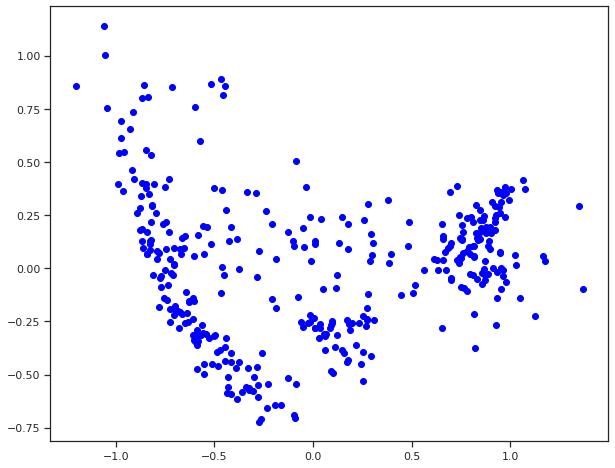

In [ ]:
model = PCA( n_components =2)
model .fit( X_data )
X_2D = model . transform ( X_data )
x = X_2D[: ,0]
y = X_2D[: ,1]
plt.figure(figsize=(10, 8))
plt.scatter( x, y, c='blue')

In [ ]:
%matplotlib inline

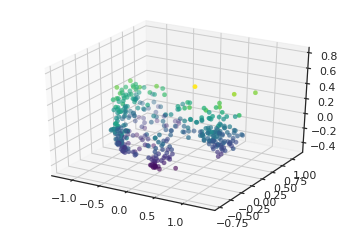

In [ ]:
from mpl_toolkits import mplot3d
#%matplotlib inline
import matplotlib.pyplot as plt
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')
ax.scatter(X_3D[: ,0], X_3D[: ,1], X_3D[: ,2], c=X_3D[: ,2], cmap='viridis', linewidth=0.2)
#ax.view_init(30, 185)
plt.show()
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


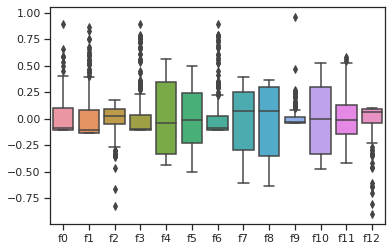

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
#sns.set_theme(style="whitegrid")
df = pd_img[ft]
#df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
for one_ft in ft:
  x = df[one_ft]
  df[one_ft] = (x-np.mean(x)) / (np.max(x)-np.min(x))
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=pd_img, color=".25")

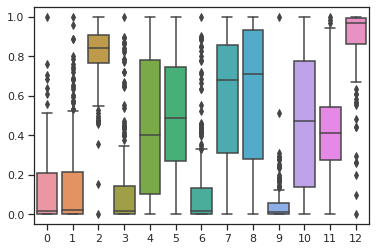

In [ ]:
df = pd.DataFrame(X_data)
ax = sns.boxplot(data=df)

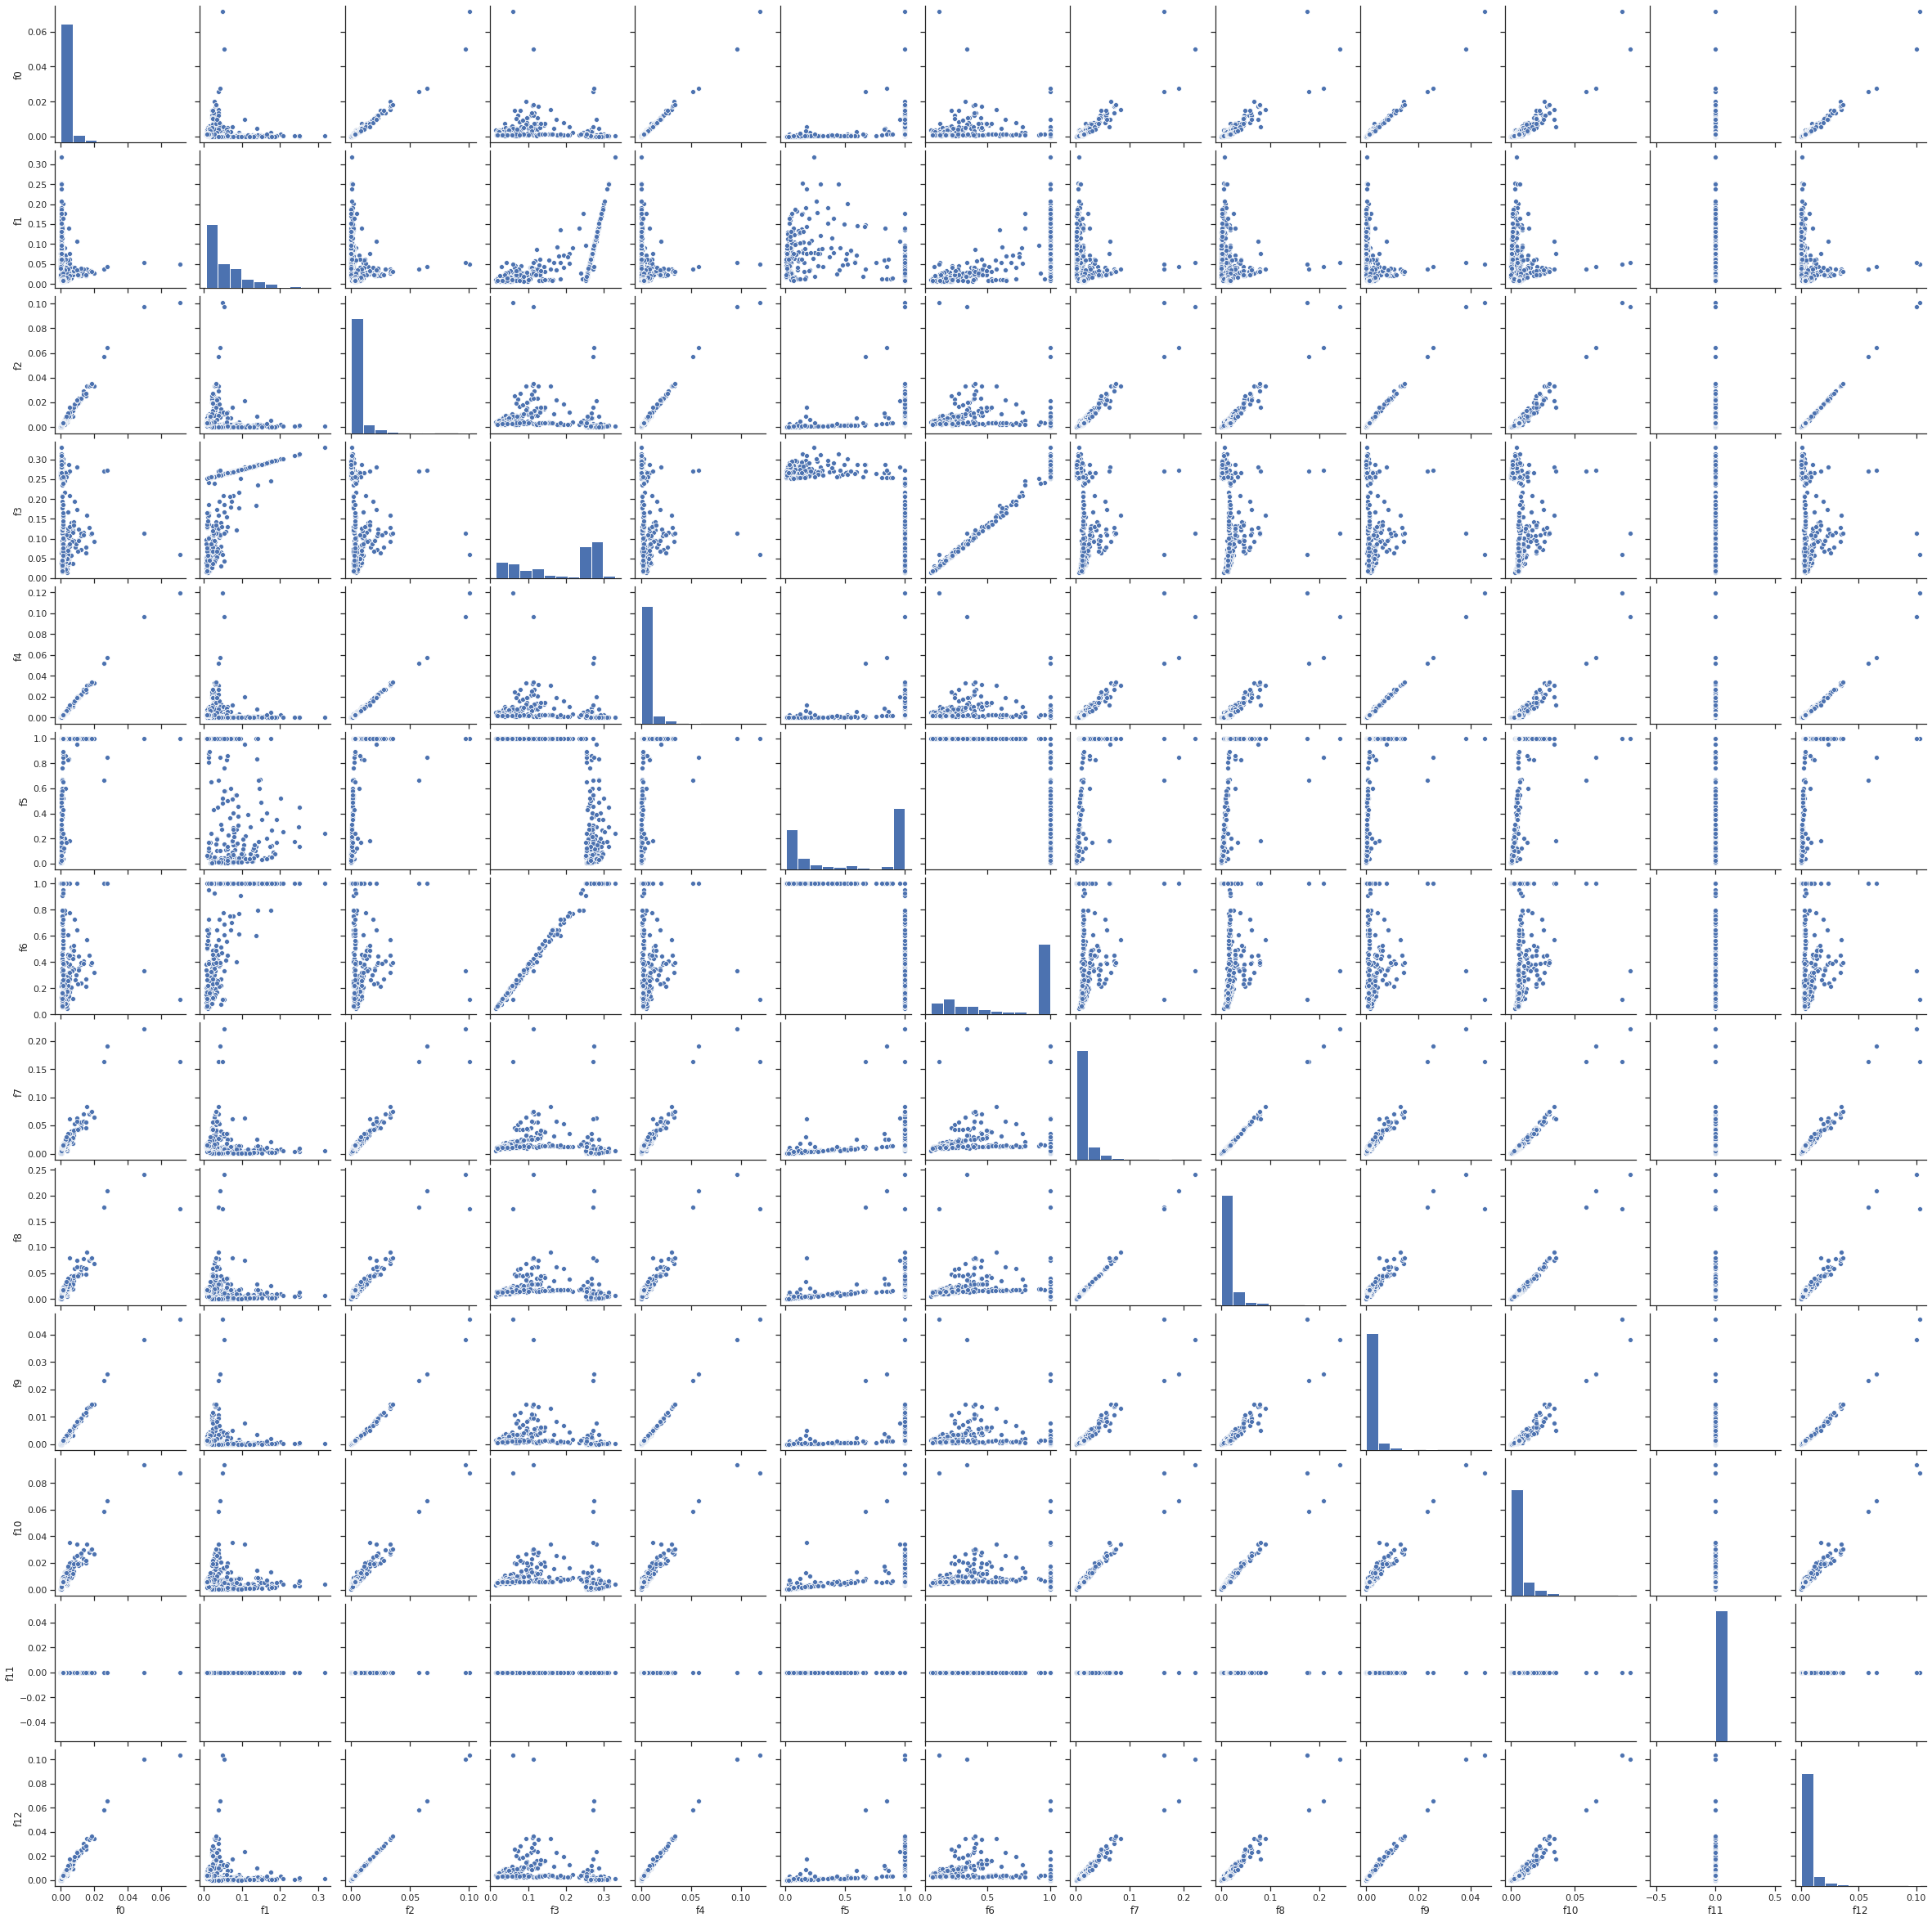

In [ ]:
import seaborn as sns
g = sns.pairplot(pd.DataFrame(df), diag_kind="hist") 